# Diffusion Models — Text-to-Image Generation

This notebook explains **Diffusion Models** step-by-step and demonstrates how to generate **text-to-image outputs** using **Stable Diffusion** without using `accelerate`.

---

## What are Diffusion Models?

Diffusion models are **generative models** that learn to **generate data by denoising it step by step**.

- They start from **pure noise** and gradually learn to reconstruct data (like an image).
- The process is inspired by how gas particles diffuse over time, but in reverse.
- They’ve become the foundation of **text-to-image** models such as:
  - **Stable Diffusion**
  - **DALL·E**
  - **Imagen**

---

### How They Work (Simplified)

1. **Forward Process (Diffusion):**
   - Noise is gradually added to the input data until it becomes pure noise.
   - The model learns how data gets corrupted.

2. **Reverse Process (Denoising):**
   - The model learns to reverse the noise process step by step.
   - It reconstructs data (e.g., an image) from random noise.

3. **Conditioning (Optional):**
   - Conditioning on **text embeddings**, so the model can generate images matching the text prompt.

---

### Core Components
- **UNet:** Denoising neural network architecture.
- **VAE (Variational Autoencoder):** Encodes and decodes images to/from latent space.
- **Text Encoder:** Encodes input text into vector embeddings (like CLIP text encoder).

---

### Libraries Used
- `diffusers` — Hugging Face’s diffusion library.
- `transformers` — For text encoding.
- `torch` — PyTorch backend.
- `PIL` — For image visualization.

---

Now let’s implement this step by step.


In [8]:
#!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu
#!pip install diffusers transformers safetensors accelerate pillow matplotlib
#!pip install matplotlib

## Importing Libraries
We’ll use Hugging Face’s `diffusers` library for Stable Diffusion.  
Make sure you have a GPU runtime (recommended).


In [9]:
from diffusers import StableDiffusionPipeline
import matplotlib.pyplot as plt
import torch

## Load Stable Diffusion Model

We’ll use a pretrained **Stable Diffusion v1.5** model.  
- It converts text prompts into embeddings.
- Generates latent images and decodes them back to pixel space.


In [3]:
model_id = "runwayml/stable-diffusion-v1-5"

# Load in full precision so CPU can handle it
pipe = StableDiffusionPipeline.from_pretrained(
    model_id,
    torch_dtype=torch.float32
).to("cpu")

print("Model loaded successfully ✅")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!


Model loaded successfully ✅


## Generate a Simple Image

We’ll now generate an image from a text prompt.  
You can modify the prompt to explore creativity!


  0%|          | 0/20 [00:00<?, ?it/s]

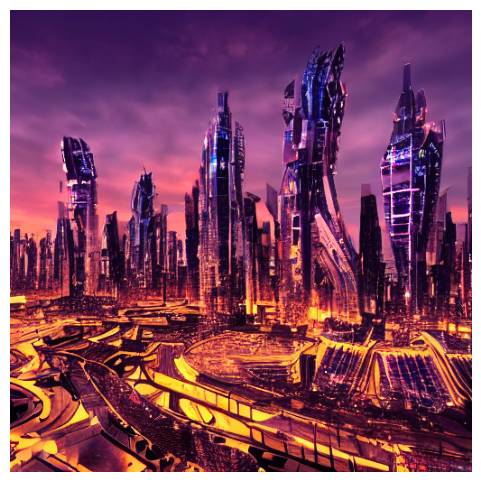

In [10]:
prompt = "a futuristic city skyline at sunset, cinematic lighting, ultra-detailed"

# Generate the image
image = pipe(prompt, num_inference_steps=20).images[0]
plt.figure(figsize=(6,6))
plt.imshow(image)
plt.axis("off")
plt.show()


## Parameters Explained

| Parameter | Description |
|------------|--------------|
| `prompt` | Text description for generation |
| `guidance_scale` | Controls prompt adherence (higher = more faithful to text) |
| `num_inference_steps` | Number of denoising steps (higher = better quality but slower) |
| `torch_dtype` | Controls computation precision |
| `safety_checker` | Filters unsafe outputs |

  0%|          | 0/20 [00:00<?, ?it/s]

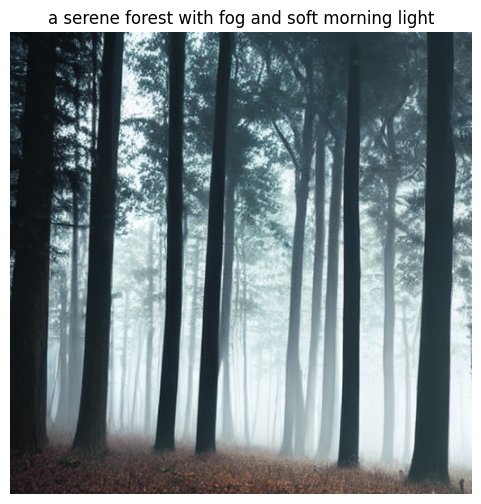

  0%|          | 0/20 [00:00<?, ?it/s]

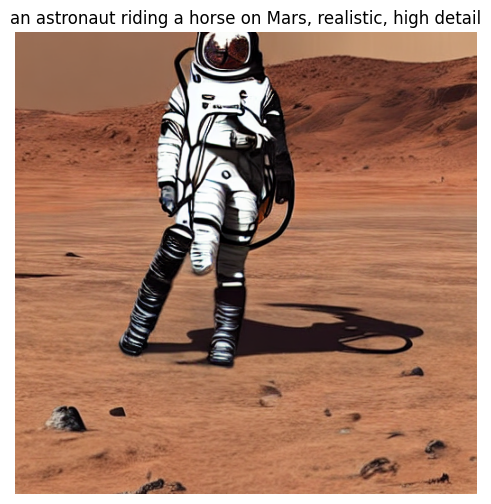

  0%|          | 0/20 [00:00<?, ?it/s]

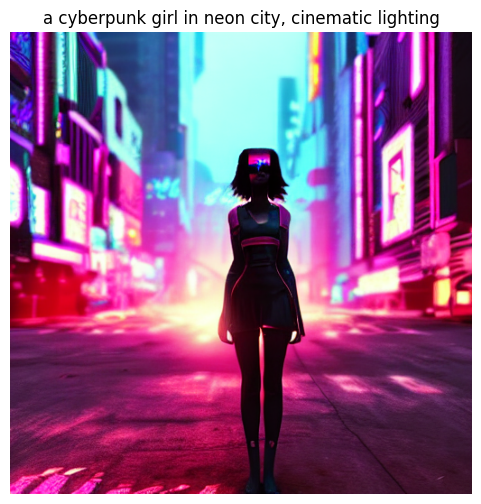

In [11]:
prompts = [
    "a serene forest with fog and soft morning light",
    "an astronaut riding a horse on Mars, realistic, high detail",
    "a cyberpunk girl in neon city, cinematic lighting"
]

for text in prompts:
    image = pipe(text, guidance_scale=8.0, num_inference_steps=20).images[0]
    plt.figure(figsize=(6,6))
    plt.imshow(image)
    plt.axis("off")
    plt.title(text)
    plt.show()


## Fine-Tuning and Customization (Conceptual)

While we’re using a pretrained model here, you can fine-tune diffusion models on custom datasets for:
- Personalized style (e.g., anime, art style)
- Domain-specific generation (e.g., medical, industrial)

Common methods:
- **DreamBooth**
- **LoRA (Low-Rank Adaptation)**
- **Textual Inversion**

All fine-tuning relies on adapting the UNet or text encoder parameters while keeping others frozen.

## Best Practices for Diffusion Models

- Use a **GPU** for efficient inference (diffusion is compute-heavy).
- Avoid overly complex prompts at first.
- Use **prompt engineering** (add lighting, style, resolution keywords).
- Experiment with **guidance_scale** and **inference steps** for better control.
- Save generated images to reuse or compare.


## Summary

In this notebook, we learned:
- How diffusion models generate images through denoising.
- How to use `StableDiffusionPipeline` from `diffusers`.
- How to adjust generation parameters.
- How to experiment with creative text prompts.


### Next Steps
- Try **LoRA fine-tuning** for personalized models.
- Explore **image-to-image** and **inpainting** with diffusion.
- Learn **prompt embeddings** for hybrid search + generation workflows.
